In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TES Project/Condo2.csv")
df.head()

,Location (Kuala Lumpur),Rooms,Bathrooms,Car Parks,Furnishing,Property Details,Size Type,Size Number (sq. ft.),Price Range
0,33,3,2.0,1.0,1,3,0,805.0,Low
1,38,3,2.0,1.0,2,3,0,850.0,Low
2,38,3,2.0,1.0,2,3,0,850.0,Low
3,33,3,2.0,1.0,2,3,0,802.0,Low
4,33,3,2.0,1.0,2,3,0,850.0,Low


In [4]:
X = df.drop('Price Range', axis=1)  # Features
y = df['Price Range']              # Target

le = LabelEncoder()
X['Location (Kuala Lumpur)'] = le.fit_transform(X['Location (Kuala Lumpur)'])
X['Furnishing'] = le.fit_transform(X['Furnishing'])
X['Property Details'] = le.fit_transform(X['Property Details'])
X['Size Type'] = le.fit_transform(X['Size Type'])

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                   test_size =0.2,
                                  random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split( X_train,y_train,
                                   test_size =0.25,
                                  random_state=42)

In [6]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print()
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)
print()
print("X_valid Shape: ",X_valid.shape)
print("y_valid Shape: ",y_valid.shape)

X_train Shape:  (10998, 8)
y_train Shape:  (10998,)

X_test Shape:  (3667, 8)
y_test Shape:  (3667,)

X_valid Shape:  (3667, 8)
y_valid Shape:  (3667,)


In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Iteration 1, loss = 0.95991682
Iteration 2, loss = 0.86575352
Iteration 3, loss = 0.83773715
Iteration 4, loss = 0.79631082
Iteration 5, loss = 0.77317704
Iteration 6, loss = 0.75434930
Iteration 7, loss = 0.73534592
Iteration 8, loss = 0.72452992
Iteration 9, loss = 0.70614471
Iteration 10, loss = 0.69561495
Iteration 11, loss = 0.67487502
Iteration 12, loss = 0.66335263
Iteration 13, loss = 0.64699165
Iteration 14, loss = 0.63446262
Iteration 15, loss = 0.63050262
Iteration 16, loss = 0.61789459
Iteration 17, loss = 0.60624187
Iteration 18, loss = 0.59779182
Iteration 19, loss = 0.59272511
Iteration 20, loss = 0.58841034
Iteration 21, loss = 0.57046112
Iteration 22, loss = 0.55774074
Iteration 23, loss = 0.55226024
Iteration 24, loss = 0.55420453
Iteration 25, loss = 0.53189414
Iteration 26, loss = 0.53304858
Iteration 27, loss = 0.52358548
Iteration 28, loss = 0.51340108
Iteration 29, loss = 0.51258107
Iteration 30, loss = 0.50309097
Iteration 31, loss = 0.49776871
Iteration 32, los

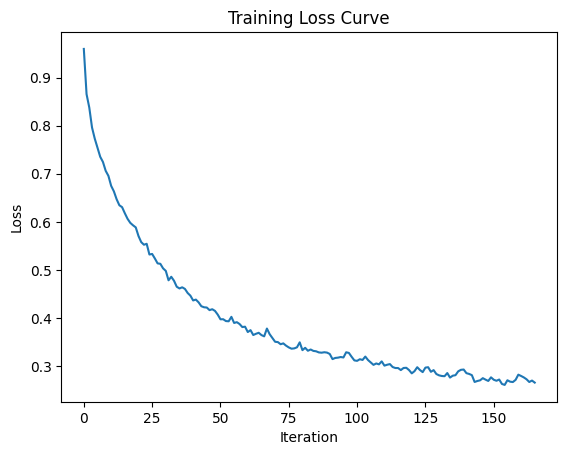

In [8]:
clf = MLPClassifier(
    hidden_layer_sizes=(2048,1024, 512, 128),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=300,
    random_state=42,
    verbose=True
)

# Train the MLP model
clf.fit(X_train, y_train)

print("Model_score: ",clf.score(X_train, y_train))

plt.plot(clf.loss_curve_)
plt.title("Training Loss Curve" )
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend
plt.show()

In [9]:

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_valid = clf.predict(X_valid)

In [10]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Train Accuracy: ", train_accuracy*100)
print("Test Accuracy: ", test_accuracy*100)
print("Valid Accuracy: ", valid_accuracy*100)

Train Accuracy:  89.66175668303327
Test Accuracy:  72.8933733296973
Valid Accuracy:  73.90237251158986


In [11]:
print(classification_report(y_test,y_pred_test,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.82      0.83      0.83       903
          High       0.66      0.68      0.67       913
           Low       0.77      0.79      0.78       909
        Medium       0.67      0.63      0.65       942

      accuracy                           0.73      3667
     macro avg       0.73      0.73      0.73      3667
  weighted avg       0.73      0.73      0.73      3667



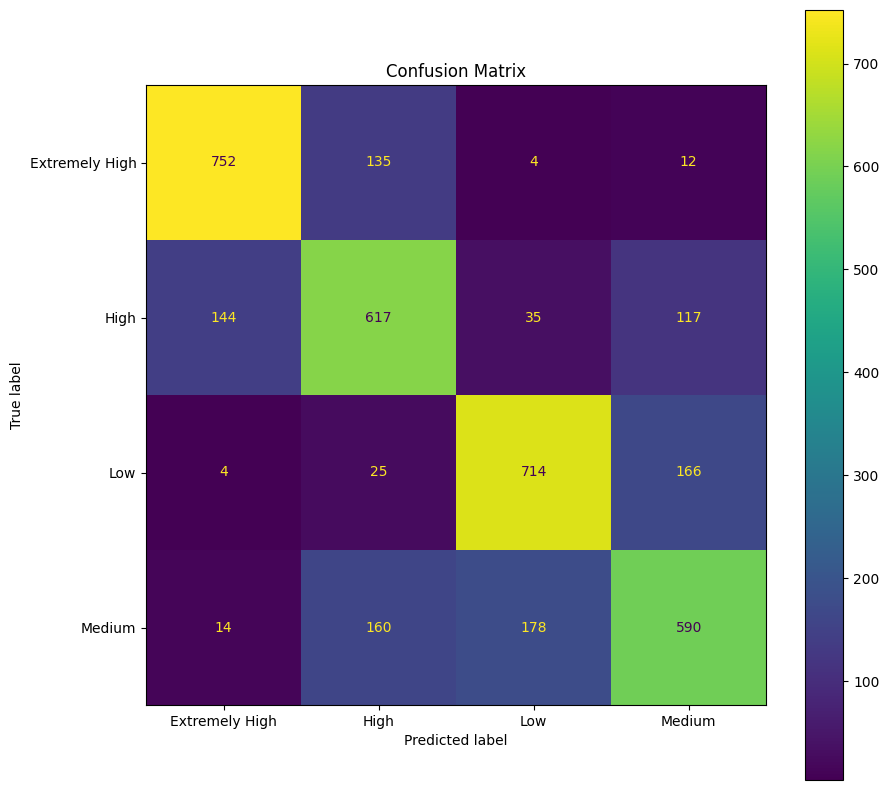

In [12]:
class_names = clf.classes_.tolist()

cm = confusion_matrix(y_test,y_pred_test,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [13]:
y_test_encoded = le.fit_transform(y_test)
y_pred_test_encoded = le.transform(y_pred_test)

y_pred_test_proba = clf.predict_proba(X_test)

print(roc_auc_score(y_test_encoded, y_pred_test_proba, multi_class='ovo'))

0.9101188821414725


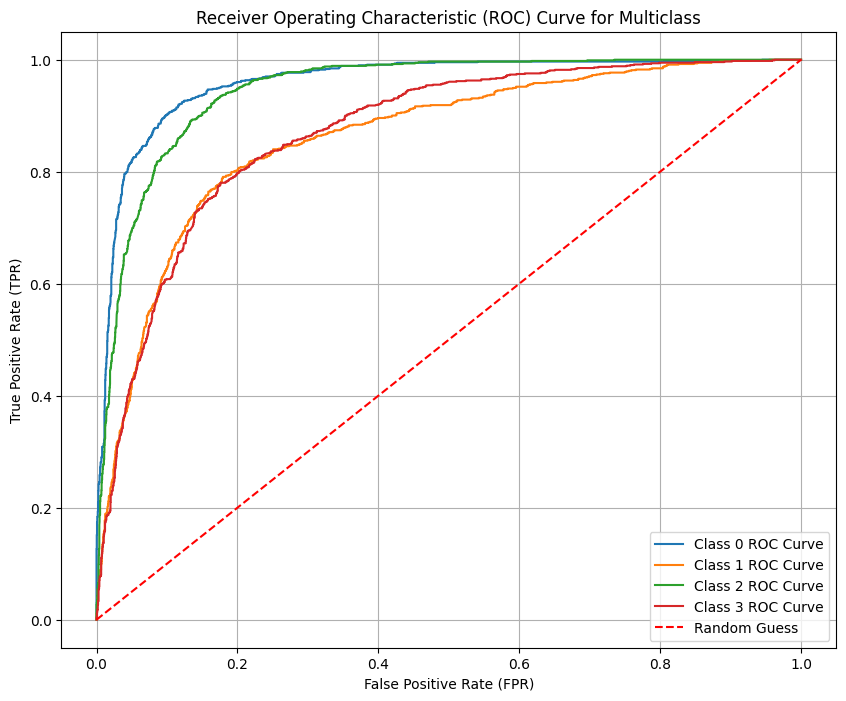

In [14]:
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(set(y_test_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [15]:
print(classification_report(y_valid,y_pred_valid,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.81      0.86      0.83       886
          High       0.71      0.67      0.69       927
           Low       0.79      0.77      0.78       952
        Medium       0.65      0.66      0.66       902

      accuracy                           0.74      3667
     macro avg       0.74      0.74      0.74      3667
  weighted avg       0.74      0.74      0.74      3667



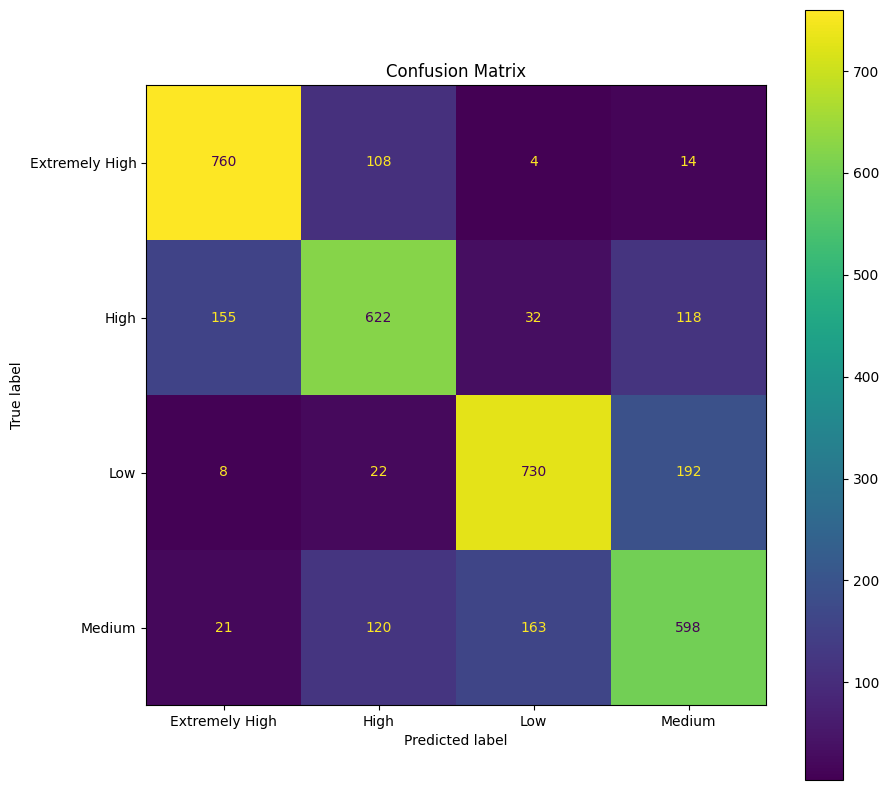

In [16]:
cm = confusion_matrix(y_valid,y_pred_valid,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)

In [17]:
y_valid_encoded = le.fit_transform(y_valid)
y_pred_valid_encoded = le.transform(y_pred_valid)

y_pred_valid_proba = clf.predict_proba(X_valid)

print(roc_auc_score(y_valid_encoded, y_pred_valid_proba, multi_class="ovo"))

0.911641818235187


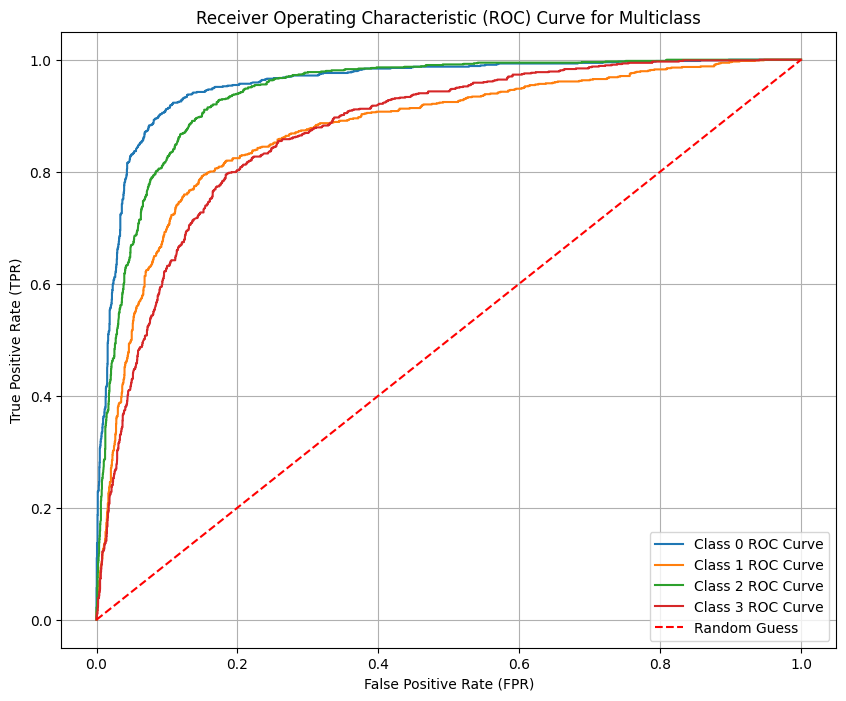

In [18]:
y_valid_binarized = label_binarize(y_valid_encoded, classes=range(len(set(y_valid_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_valid_binarized[:, i], y_pred_valid_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [19]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/MLP_model.joblib'

joblib.dump(clf, save_path)

print(f"Best XGB model saved to: {save_path}")

Best XGB model saved to: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/MLP_model.joblib
